<a href="https://colab.research.google.com/github/Pawandeep-Singh30/ARTIFICIAL-INTELLIGENCE/blob/main/LAB_2_AI_ASSIGNMENT_PAWANDEEPSINGH_22011772.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== A* PATHFINDING (10x10 GRID) ===
Grid positions are entered as: row column (0–9 range)
Start = (0,0), Goal = (9,9)

Enter number of obstacles (15–20): 20
Enter obstacle coordinates (row col), one per line:
Obstacle 1: 4 5
Obstacle 2: 6 7
Obstacle 3: 3 2
Obstacle 4: 2 2
Obstacle 5: 7 8
Obstacle 6: 5 6
Obstacle 7: 2 9
Obstacle 8: 1 1
Obstacle 9: 0 7
Obstacle 10: 0 3
Obstacle 11: 6 2
Obstacle 12: 4 2
Obstacle 13: 1 8
Obstacle 14: 7 2
Obstacle 15: 9 3
Obstacle 16: 8 1
Obstacle 17: 5 5
Obstacle 18: 2 8
Obstacle 19: 1 4
Obstacle 20: 0 2

Running A*...

✅ Path found!
Total cost (steps): 18
Nodes expanded: 44
Path:
[(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (6, 4), (6, 5), (6, 6), (7, 6), (7, 7), (8, 7), (8, 8), (8, 9), (9, 9)]

Grid (top-to-bottom view):
. . . █ . . . . . G
. █ . . . . . * * *
. . █ . . . * * █ .
. . █ . * * * █ . .
. * * * * █ █ . . .
. * █ . . █ . . . .
. * █ . . . . . . .
* * █ . . . . . █ █
* █ . . █ . . . █ .
S . █ █ . . . █ . .


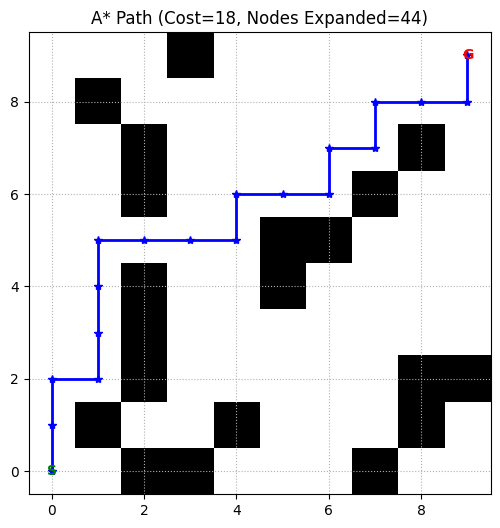

In [2]:
#PAWANDEEP SINGH A/L BALWINDER SINGH (22011772)
#LAB 2 ASSIGNMENT

import heapq
import matplotlib.pyplot as plt
import numpy as np

ROWS, COLS = 10, 10
START = (0, 0)
GOAL = (9, 9)

# Heuristic function (Manhattan)
def manhattan(a, b):
    """Return Manhattan distance between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# Get 4-directional neighbors
def neighbors(node):
    """Return up, down, left, right valid neighbors."""
    r, c = node
    for dr, dc in [(1,0), (-1,0), (0,1), (0,-1)]:
        nr, nc = r + dr, c + dc
        if 0 <= nr < ROWS and 0 <= nc < COLS:
            yield (nr, nc)


# A* Search Algorithm
def astar(grid, start, goal):
    """Perform A* algorithm to find shortest path."""
    open_heap = []
    g_score = {start: 0}
    f_score = {start: manhattan(start, goal)}
    heapq.heappush(open_heap, (f_score[start], start))
    came_from = {}
    closed = set()
    nodes_expanded = 0

    while open_heap:
        f, current = heapq.heappop(open_heap)
        if current in closed:
            continue
        closed.add(current)
        nodes_expanded += 1

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, g_score[goal], nodes_expanded

        for nbr in neighbors(current):
            if grid[nbr] == 1:  # obstacle
                continue
            tentative_g = g_score[current] + 1
            if nbr not in g_score or tentative_g < g_score[nbr]:
                came_from[nbr] = current
                g_score[nbr] = tentative_g
                f_score[nbr] = tentative_g + manhattan(nbr, goal)
                heapq.heappush(open_heap, (f_score[nbr], nbr))

    return None, None, nodes_expanded

def main():
    print("=== A* PATHFINDING (10x10 GRID) ===")
    print("Grid positions are entered as: row column (0–9 range)")
    print("Start = (0,0), Goal = (9,9)")
    print()

    grid = np.zeros((ROWS, COLS), dtype=int)
    num_obs = int(input("Enter number of obstacles (15–20): "))

    print("Enter obstacle coordinates (row col), one per line:")
    for i in range(num_obs):
        while True:
            try:
                r, c = map(int, input(f"Obstacle {i+1}: ").split())
                if (r, c) in (START, GOAL):
                    print("⚠️ Can't place obstacle at start or goal.")
                    continue
                if not (0 <= r < ROWS and 0 <= c < COLS):
                    print("⚠️ Coordinates must be between 0 and 9.")
                    continue
                grid[r, c] = 1
                break
            except ValueError:
                print("⚠️ Invalid input. Enter two integers (e.g., 3 4).")

    print("\nRunning A*...")
    path, cost, expanded = astar(grid, START, GOAL)

    if path is None:
        print("\n❌ No path found. Try different obstacle placement.")
    else:
        print("\n✅ Path found!")
        print(f"Total cost (steps): {cost}")
        print(f"Nodes expanded: {expanded}")
        print("Path:")
        print(path)

        text_grid = np.full((ROWS, COLS), '.', dtype='<U2')
        for r in range(ROWS):
            for c in range(COLS):
                if grid[r, c] == 1:
                    text_grid[r, c] = '█'
        text_grid[START] = 'S'
        text_grid[GOAL] = 'G'
        for (r, c) in path:
            if (r, c) not in (START, GOAL):
                text_grid[r, c] = '*'

        print("\nGrid (top-to-bottom view):")
        for r in range(ROWS - 1, -1, -1):
            print(' '.join(text_grid[r, :]))

        plt.figure(figsize=(6, 6))
        plt.imshow(grid, origin='lower', cmap='gray_r')
        path_rows = [p[0] for p in path]
        path_cols = [p[1] for p in path]
        plt.plot(path_cols, path_rows, marker='*', color='blue', linewidth=2)
        plt.text(START[1], START[0], 'S', ha='center', va='center', color='green', fontweight='bold')
        plt.text(GOAL[1], GOAL[0], 'G', ha='center', va='center', color='red', fontweight='bold')
        plt.title(f"A* Path (Cost={cost}, Nodes Expanded={expanded})")
        plt.grid(True, linestyle=':')
        plt.show()

if __name__ == "__main__":
    main()
